# 1. Import các thư viện cần thiết và đọc data

In [1]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = 'data_output/all_articles.csv'
print(PATH)

data_output/all_articles.csv


In [3]:
data = pd.read_csv(PATH).drop_duplicates()
data = data.reset_index(drop=True)
data.head()

,title,price,size,unit,streetAddress,addressLocality,addressRegion,time_update,post_id,direction,...,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,🍀🍀🍀Bán gấp căn nhà NGAY CHỢ BÌNH CHÁNH đang ch...,630 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17230039,NaN,...,Sổ hồng/ Sổ đỏ,6m,19m,1.0,3.0,yes,yes,yes,yes,NaN
1,CỰC HIẾM_NHÀ C4 MẶT PHỐ DOÃN UẨN–VIEW PHÁO HOA...,"10,5 tỷ",148,m²,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,2025-10-13,17363855,NaN,...,Sổ hồng/ Sổ đỏ,5m,30m,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà Trường Chinh, 5x16, có 7 phòng trọ, ph...","6,8 tỷ",80,m²,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17486637,NaN,...,Sổ hồng/ Sổ đỏ,5m,16m,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,"Bán nhà Phan Huy Ích 14x33, Biệt Thự cổ, chính...",38 tỷ,462,m²,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17487248,NaN,...,Sổ hồng/ Sổ đỏ,14m,33m,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,Kẹt tiền nên chú Hai cần bán gấp 2 căn nhà đan...,650 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17451076,NaN,...,Sổ hồng/ Sổ đỏ,6m,20m,2.0,3.0,yes,yes,NaN,NaN,NaN


# 1.5. Chuẩn hóa đơn vị

In [4]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Xem phân bố nhãn đơn vị

In [5]:
data['unit'].value_counts()

unit
m²    3274
Name: count, dtype: int64

#### Xóa bỏ các cột không mang ý nghĩa phân tích

In [6]:
data = data.drop(['title', 'post_id', 'unit', 'time_update', 'listing_type'], axis=1)
data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630 triệu,120,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8m,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6m,19m,1.0,3.0,yes,yes,yes,yes,NaN
1,"10,5 tỷ",148,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,"7,5m",Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,30m,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"6,8 tỷ",80,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4m,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5m,16m,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,38 tỷ,462,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12m,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14m,33m,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,650 triệu,120,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8m,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6m,20m,2.0,3.0,yes,yes,NaN,NaN,NaN


Chuẩn hóa số, đơn vị tính toán

In [7]:
def extract_number(value):
    if pd.isna(value) or not isinstance(value, str):
        return np.nan
    value = value.replace(",", ".")
    value = value.split('m')[0].strip()
    try:
        return float(value)
    except ValueError:
        return np.nan


def feature_preprocessing(data):
    """Hàm tiền xử lý, chuẩn hóa cho dữ liệu thô"""

    data = data.copy()

    # Chuẩn hóa giá tiền price
    price_pre = []
    for index, price  in enumerate(data['price']):

        if 'triệu / m²' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * data['size'][index]) # Nếu xuất hiện đơn vị triệu / m², nhân nó với cột chứa size (m²)
        elif 'tỷ' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * 1000) # Nếu đơn vị là tỷ, quy về triệu
        elif 'triệu' in price:
            price_pre.append(float(price.replace(",", ".").split()[0])) # Nếu đã là triệu, thêm trực tiếp
        elif 'Thỏa thuận' in price:
            pass
        else:
            print(price, type(price))
            print(data['size'][index], type(data['size'][index]))
            pass
    
    data['price'] = pd.Series(price_pre)

    # Trích xuất số cho các cột số bị lẫn đơn vị văn bản
    cols_need_extract = ['road_width', 'width', 'length']
    for col in cols_need_extract:
        data[col] = data[col].apply(extract_number)

    data = data.dropna(subset=['price'])

    # Chuyển feature đơn vị data['size'] về dạng float, xử lý với các kiểu dữ liệu không thể chuyển được qua (drop), cụ thể là sample 43.000.000
    data['size'] = pd.to_numeric(data['size'], errors='coerce')
    data = data.dropna(subset=['size'])

    data = data.reset_index(drop=True)

    return data

In [8]:
data = feature_preprocessing(data)
data.head()

9 ngàn <class 'str'>
32 <class 'str'>


,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


# 2. EDA phân tích data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3259 non-null   float64
 1   size             3259 non-null   float64
 2   streetAddress    3000 non-null   object 
 3   addressLocality  3248 non-null   object 
 4   addressRegion    3259 non-null   object 
 5   direction        800 non-null    object 
 6   road_width       3069 non-null   float64
 7   property_type    3259 non-null   object 
 8   legal_documents  2485 non-null   object 
 9   width            2635 non-null   float64
 10  length           2156 non-null   float64
 11  num_floors       2281 non-null   float64
 12  num_bedrooms     2279 non-null   float64
 13  has_dining_room  1149 non-null   object 
 14  has_kitchen      1164 non-null   object 
 15  has_rooftop      1014 non-null   object 
 16  has_parking      1084 non-null   object 
 17  is_owner      

In [10]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,3.259000e+03,3259.000000,3069.000000,2635.000000,2156.000000,2281.000000,2279.000000
mean,2.355520e+04,130.211334,11.222646,7.819647,21.375874,4.415607,6.848179
std,6.156950e+04,128.392830,16.136534,12.139384,17.089451,4.248942,12.996107
min,1.728000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.600000e+03,61.000000,5.000000,4.500000,15.000000,2.000000,3.000000
50%,9.300000e+03,91.000000,7.500000,5.000000,19.000000,4.000000,4.000000
75%,2.000000e+04,143.000000,14.000000,8.000000,24.000000,5.000000,6.000000
max,1.350000e+06,995.000000,715.000000,485.000000,415.000000,40.000000,264.000000


Trực quan hóa nhãn giá nhà, tạo ra cột mới là giá/đơn vị để dễ tìm kiếm giá trị ngoại lai

In [11]:
data['price_per_unit'] = data['price'] / data['size']
data['price_per_unit'].head()

0     5.250000
1    70.945946
2    85.000000
3    82.251082
4     5.416667
Name: price_per_unit, dtype: float64

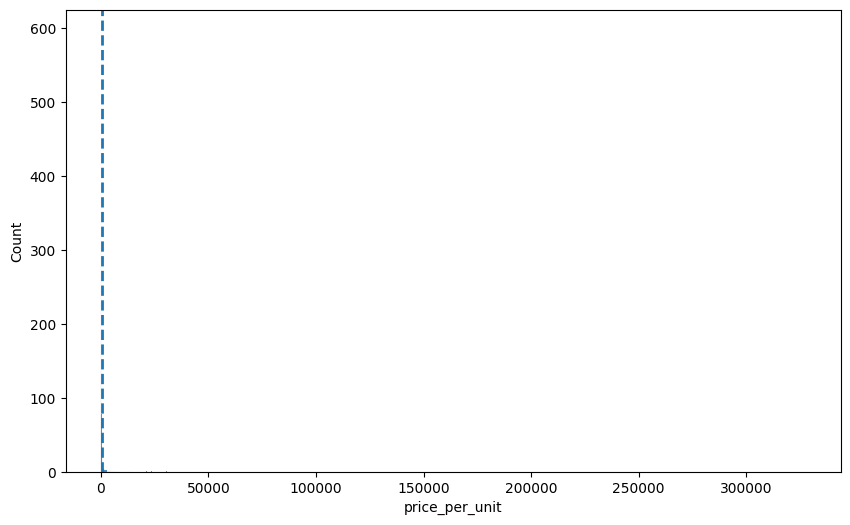

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_unit'])
plt.axvline(x=data['price_per_unit'].mean(), linestyle="--", linewidth=2)


In [13]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms,price_per_unit
count,3.259000e+03,3259.000000,3069.000000,2635.000000,2156.000000,2281.000000,2279.000000,3259.000000
mean,2.355520e+04,130.211334,11.222646,7.819647,21.375874,4.415607,6.848179,738.649915
std,6.156950e+04,128.392830,16.136534,12.139384,17.089451,4.248942,12.996107,7343.513771
min,1.728000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.017647
25%,4.600000e+03,61.000000,5.000000,4.500000,15.000000,2.000000,3.000000,40.883117
50%,9.300000e+03,91.000000,7.500000,5.000000,19.000000,4.000000,4.000000,101.216216
75%,2.000000e+04,143.000000,14.000000,8.000000,24.000000,5.000000,6.000000,241.522989
max,1.350000e+06,995.000000,715.000000,485.000000,415.000000,40.000000,264.000000,327510.917031


Do phát hiện có ngoại lai RẤT LỚN là, tức 1000 tỷ/m2, nên giá trị này rất vô lý, có khẳ năng là lỗi nhập liệu, nên sẽ  tiến hành loại bỏ lỗi outlier CỰC ĐOAN 

In [14]:
def remove_outlier_with_IQR(data, col_name, LowerFence, UpperFence):
    data_col_have_outlier = data[col_name]

    Q1 = data_col_have_outlier.quantile(0.25)
    Q3 = data_col_have_outlier.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - LowerFence * IQR
    upper_bound = Q3 + UpperFence * IQR 

    final_data = data[(data[col_name] >= lower_bound) & (data[col_name] <= upper_bound)]

    return final_data

In [15]:
data = remove_outlier_with_IQR(data, 'price_per_unit', 1.5, 1.5)
data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner,price_per_unit
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN,5.250000
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,70.945946
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,85.000000
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,82.251082
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN,5.416667


In [16]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms,price_per_unit
count,2877.000000,2877.000000,2712.000000,2336.000000,1904.000000,2021.000000,2019.000000,2877.000000
mean,12462.667712,138.739345,11.133628,7.263737,20.151423,4.395349,6.936107,121.916950
std,14769.682003,131.590403,16.695547,11.264510,13.110464,4.239788,13.181976,118.448669
min,1.728000,1.243000,0.000000,0.000000,0.000000,1.000000,1.000000,0.017647
25%,4100.000000,67.000000,5.000000,4.500000,15.000000,2.000000,3.000000,35.450237
50%,8130.000000,100.000000,7.500000,5.000000,19.000000,3.000000,4.000000,83.750000
75%,15900.000000,150.000000,13.000000,8.000000,23.000000,5.000000,6.000000,167.164179
max,250000.000000,995.000000,715.000000,485.000000,415.000000,40.000000,264.000000,541.666667


Biểu đồ cột thể hiện phân bố giá nhà sau khi loại bỏ cực đoan

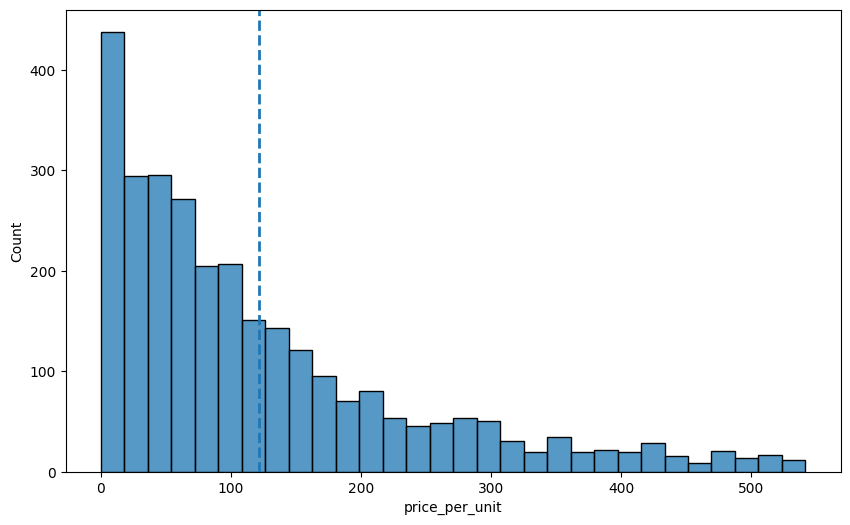

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_unit'])
plt.axvline(x=data['price_per_unit'].mean(), linestyle="--", linewidth=2)


drop gía trị price/unit sau khi đã sử dụng do có tương quan tỷ lệ với price và unit

In [18]:
data = data.drop(['price_per_unit'], axis=1)
data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


Kiểm tra phân bố giá trị missing value

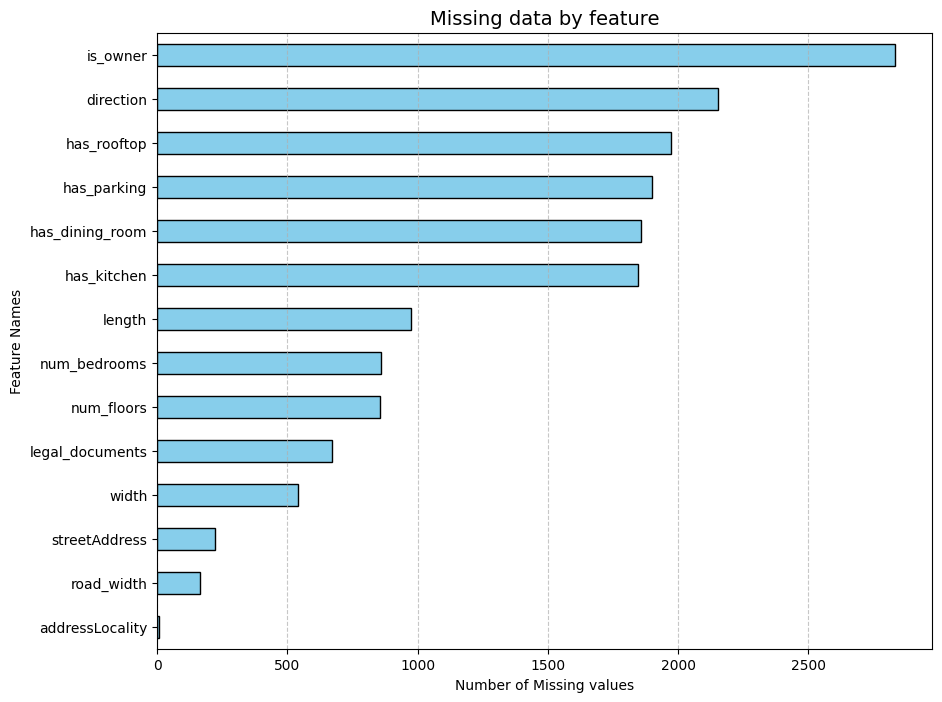

In [19]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing.plot.barh(color="skyblue", edgecolor="black")
plt.title("Missing data by feature", fontsize=14)
plt.xlabel("Number of Missing values")
plt.ylabel("Feature Names")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

Biểu đổ ma trận tương quan thể hiện mức độ tương quan giữa các biến số trong tập dữ liệu:
- Tông xanh thể hiện tương quan âm
- Tông đỏ thể hiện tưởng quan dương

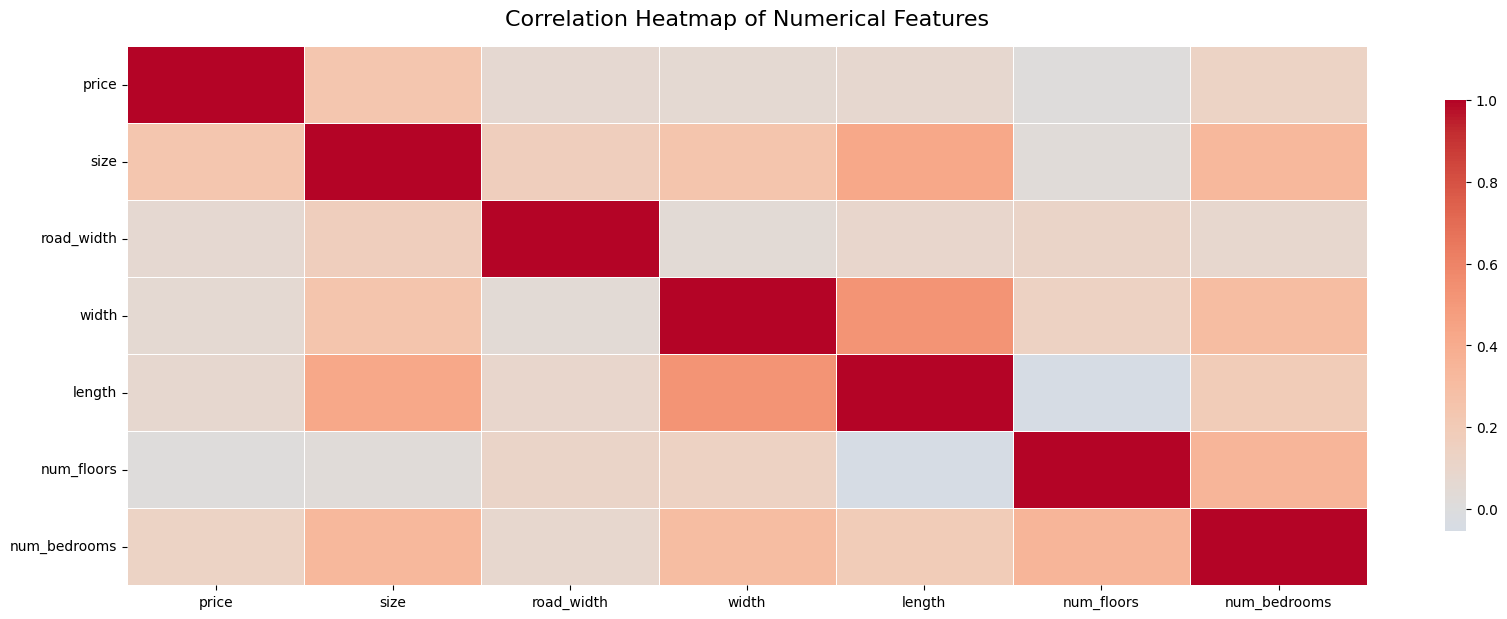

In [20]:
plt.figure(figsize=(20, 7))
sns.heatmap(
    data.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()

# 3. Tiền xử lý dữ liệu

In [21]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler


import matplotlib.pyplot as plt
import seaborn as sns

Chuẩn hóa cột giá trị bool về nhị phân thay vì yes, no

In [22]:
def bool_to_num(sample):
    if sample == 'yes':
        return 1


cols_bool = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
for col in cols_bool:
    data[col] = data[col].apply(bool_to_num)

data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,1.0,1.0,1.0,1.0,NaN
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN


#### Fill missing value bằng các chiến lược cụ thể với từng feature

In [23]:
def fill_missing_value(data):
    data = data.copy()

    # Các category có ý nghĩa nên fillna bằng unknown
    cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'legal_documents']
    data[cat_cols] = data[cat_cols].fillna("Unknown")

    # Fillna các continue feature bằng chiến lược mean
    cont_cols = ['road_width', 'width', 'length']
    data[cont_cols] = data[cont_cols].apply(lambda x: x.fillna(x.mean()))

    # Fillna các feature dạng số tầng
    floor_cols = ['num_floors', 'num_bedrooms']
    # Fillna các feature giá trị bool, giá trị 0 có thể coi là không biết
    bool_cols = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']

    data[floor_cols + bool_cols] = data[floor_cols + bool_cols].fillna(0)

    data = data.dropna(subset=['price'])

    data.reset_index()

    return data 

In [24]:
data = fill_missing_value(data)
data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,Unknown,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,Unknown,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,Unknown,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,Unknown,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,Unknown,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0


In [25]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,12462.667712,138.739345,11.133628,7.263737,20.151423,3.087591,4.867570,0.354536,0.358012,0.313869,0.339937,0.015294
std,14769.682003,131.590403,16.209550,10.149889,10.664562,4.082253,11.489012,0.478456,0.479499,0.464144,0.473770,0.122740
min,1.728000,1.243000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4100.000000,67.000000,5.000000,5.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8130.000000,100.000000,8.000000,6.000000,20.151423,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15900.000000,150.000000,12.000000,7.263737,20.151423,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,250000.000000,995.000000,715.000000,485.000000,415.000000,40.000000,264.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Xem thử phân bố để xác định feature có outlier, vì đã loại bỏ các giá trị outlier liên quan đến giá nhà, tức lỗi nhập liệu, vậy giá trị còn lại có khả năng là nhà siêu to khổng lồ nên sẽ đắt và có chiều dài, rộng lớn hơn (biệt văn thự)

Chia ra 2 tập train, test với tỷ lệ 80-20, scaler, chuẩn hóa để tránh data leak

In [26]:
from sklearn.model_selection import train_test_split



train, test = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
)

X_train = train.drop(['price'], axis=1)
X_test = test.drop(['price'], axis=1)

y_train = train['price'].values 
y_test = test['price'].values 



In [27]:
X_train.head()

,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
1591,50.0,Đường Thúy Lĩnh,Phường Lĩnh Nam,Hà Nội,Unknown,5.0,Nhà trong hẻm,Unknown,5.000000,10.000000,5.0,4.0,1.0,1.0,1.0,1.0,0.0
1053,51.0,Đường Khương Đình,Phường Khương Đình,Hà Nội,Unknown,3.5,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.000000,20.151423,4.0,5.0,1.0,1.0,1.0,1.0,0.0
1895,36.0,Đường Phúc Lợi,Phường Phúc Lợi,Hà Nội,Unknown,5.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,7.263737,20.151423,5.0,3.0,0.0,0.0,0.0,0.0,0.0
3012,250.0,Đường Cách Mạng Tháng Tám,Phường Bến Thành,Hồ Chí Minh,Unknown,30.0,"Nhà hàng, khách sạn",Unknown,12.000000,25.000000,10.0,65.0,1.0,1.0,1.0,1.0,0.0
1472,107.0,Unknown,Phường Quy Nhơn,Gia Lai,Unknown,16.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.300000,25.000000,3.0,5.0,0.0,0.0,0.0,0.0,0.0


Lọc ra các category quan trọng để giữ lại, còn lại cho vào "Other" để tránh curse of dimention

In [ ]:
# def reduce_categories(data, col, threshold=100):
#     """Giữ lại top N categories, gộp còn lại thành 'Other'"""
#     value_counts = data[col].value_counts()
#     top_categories = value_counts.head(threshold).index
#     data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')
#     return data

# # Áp dụng trước khi One-Hot Encoding
# for col in ['streetAddress', 'addressLocality', 'addressRegion']:
#     data = reduce_categories(data, col, threshold=50)  # Chỉ giữ 50 giá trị phổ biến nhất

Mã hóa 1hot-encoder với các feature dạng categorical

In [ ]:
# cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']
# OneHot = OneHotEncoder(
#     handle_unknown="ignore",
#     sparse_output=False
# )
# OneHot.fit(X_train[cat_cols])

# OneHot_cols = list(OneHot.get_feature_names_out(cat_cols))

# X_train[OneHot_cols] = OneHot.transform(X_train[cat_cols])
# X_test[OneHot_cols] = OneHot.transform(X_test[cat_cols])

# X_train = X_train.drop(cat_cols, axis=1)
# X_test = X_test.drop(cat_cols, axis=1)


thử encode categories feature bầng target encoder, với mục tiêu encode thành 1 cột qua mean label để tránh curse of dimension

In [28]:
from category_encoders import TargetEncoder

cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']
target_encoder = TargetEncoder(cols=cat_cols)
X_train_encoded = target_encoder.fit_transform(X_train[cat_cols], y_train)
X_test_encoded = target_encoder.transform(X_test[cat_cols])

X_train = X_train.drop(cat_cols, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

X_test = X_test.drop(cat_cols, axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [29]:
X_train

,size,road_width,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner,streetAddress,addressLocality,addressRegion,direction,property_type,legal_documents
1591,50.0,5.0,5.000000,10.000000,5.0,4.0,1.0,1.0,1.0,1.0,0.0,11040.955335,11446.927877,11711.980088,12652.030631,9919.205740,13235.554811
1053,51.0,3.5,4.000000,20.151423,4.0,5.0,1.0,1.0,1.0,1.0,0.0,12555.712346,12944.582830,11711.980088,12652.030631,9919.205740,12312.822956
1895,36.0,5.0,7.263737,20.151423,5.0,3.0,0.0,0.0,0.0,0.0,0.0,11656.568689,11373.504057,11711.980088,12652.030631,9919.205740,12312.822956
3012,250.0,30.0,12.000000,25.000000,10.0,65.0,1.0,1.0,1.0,1.0,0.0,12370.004864,11522.719148,13998.233444,12652.030631,13813.192597,13235.554811
1472,107.0,16.0,4.300000,25.000000,3.0,5.0,0.0,0.0,0.0,0.0,0.0,11930.218751,11823.739199,10935.294979,12652.030631,14411.980246,12312.822956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,90.0,12.0,4.500000,20.151423,4.0,3.0,1.0,1.0,1.0,1.0,0.0,11789.716596,13218.072189,11386.177676,12652.030631,14411.980246,12312.822956
1205,225.0,33.0,9.000000,25.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,11807.700657,13884.890576,13407.366604,12652.030631,14411.980246,13235.554811
1243,179.0,16.0,6.900000,28.500000,0.0,6.0,0.0,0.0,0.0,0.0,0.0,15960.137904,13937.617438,12686.437522,11230.566916,12770.482123,12312.822956
1441,200.0,5.0,15.360000,12.960000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13289.791607,12911.986968,11454.526620,12652.030631,12770.482123,12312.822956


Xem thử outlier của dữ liệu số tổng quan (trước khi tách train/test), để tìm chiến lược scaler phù hợp: std, robus hay loại bỏ qua IQR
- Ở đây được chọn robus scaler vì dữ liệu outlier có khả năng là nhà siêu to khổng lồ

$$
x_{RobusScaler} = \frac{x - Q2}{Q3 - Q1}
$$

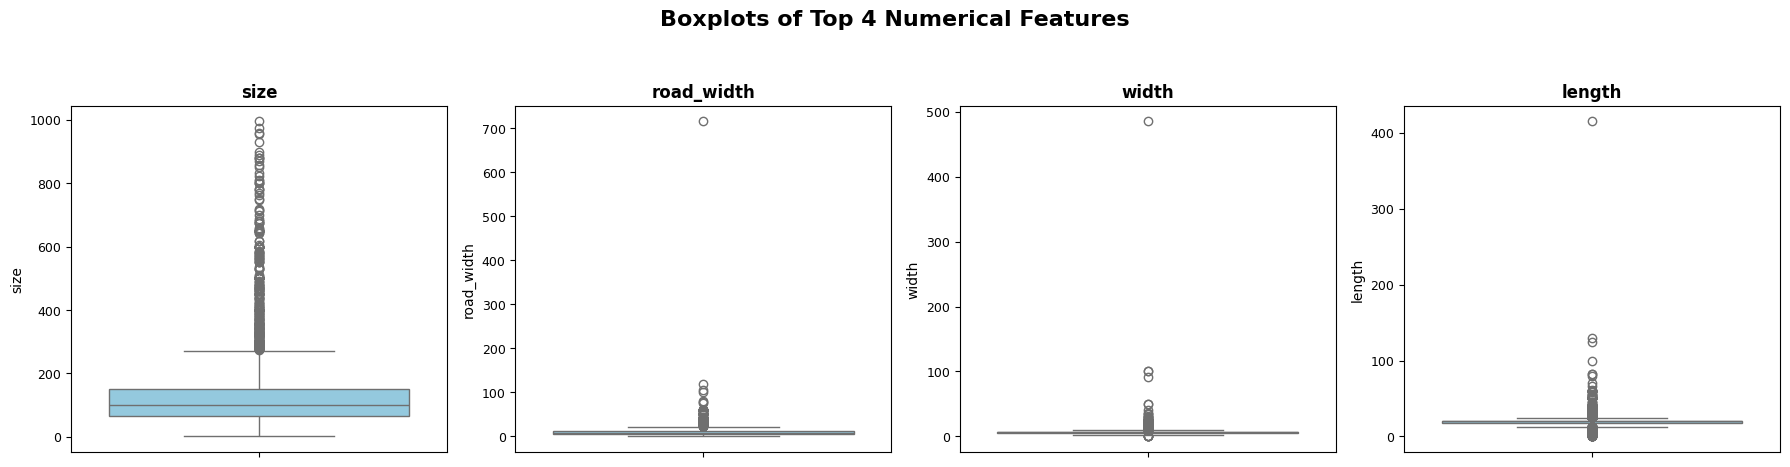

In [30]:
numberic_cols = ['size', 'road_width', 'width', 'length']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numberic_cols):
    sns.boxplot(data=data, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(numberic_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 4 Numerical Features", fontsize=16, 
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()

In [31]:
numberic_cols = ['size', 'road_width', 'width', 'length']

NumbericScaler = RobustScaler()
NumbericScaler.fit(X_train[numberic_cols])

X_train[numberic_cols] = NumbericScaler.transform(X_train[numberic_cols])
X_test[numberic_cols] = NumbericScaler.transform(X_test[numberic_cols])

# 4. Huấn luyện mô hình sử dụng bộ dữu liệu đã được tiền xử lý trước đó, bộ dữ liệu gồm:
- 1 chỉ số numberic được giữ nguyên: ['num_floors']
- 4 chỉ số numberic được scaler qua chiến lược robus scaler: ['size', 'road_width', 'width', 'length']
- 5 chỉ số book : ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
- Các chỉ số category được 1hot encoder: ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']

In [32]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, minmax_scale
from sklearn.preprocessing import PolynomialFeatures
# Import các model
# simple model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Tiến hành dự đoán cho model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForestRegressor": RandomForestRegressor(
        max_depth=10,          
        min_samples_split=50,  
        min_samples_leaf=20,
        max_features=0.3        
    ),
    "XGBRegressor": XGBRegressor(
        max_depth=5,
        learning_rate=0.01,     
        n_estimators=500,
        subsample=0.8,
        colsample_bytree=0.3,   
        reg_alpha=1,            
        reg_lambda=10         
    )
}

# Danh sách lưu trữ kết quả
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

# Huấn luyện và lưu trữ đnash giá cho mô hình
for name, model in models.items():
    
    regressor = model.fit(X_train, y_train)

    # predict
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Lưu kết quả
    model_names.append(model)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# Taoj datafame tổng hợp để nhìn 
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by='Test_R2', ascending=False)

df_results

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
3,"(DecisionTreeRegressor(max_depth=10, max_featu...",11732.052004,12568.304563,0.415193,-0.067587
4,"XGBRegressor(base_score=None, booster=None, ca...",10467.245894,12677.400309,0.534489,-0.086201
1,Ridge(),12311.424578,13645.922436,0.356006,-0.258507
2,Lasso(),12311.427459,13646.044780,0.356006,-0.258529
0,LinearRegression(),12311.410677,13646.291297,0.356008,-0.258575


Thử poly feature cho các mô hình tuyến tính

In [ ]:
numberic_cols = ['size', 'road_width', 'width', 'length']

poly_features = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False
)

train_poly = poly_features.fit_transform(X_train[numberic_cols])
test_poly = poly_features.transform(X_test[numberic_cols])

X_train_poly = np.hstack([train_poly, X_train.drop(numberic_cols, axis=1).values])
X_test_poly = np.hstack([test_poly, X_test.drop(numberic_cols, axis=1).values])

In [ ]:
# Tiến hành dự đoán cho model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Danh sách lưu trữ kết quả
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

# Huấn luyện và lưu trữ đnash giá cho mô hình
for name, model in models.items():
    
    regressor = model.fit(X_train_poly, y_train)

    # predict
    y_train_pred = regressor.predict(X_train_poly)
    y_test_pred = regressor.predict(X_test_poly)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Lưu kết quả
    model_names.append(model)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# Taoj datafame tổng hợp để nhìn 
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by='Test_R2', ascending=False)

df_results